## Objetivo - Estudo Automação com Beautiful Soup
<br>Ações a serem buscadas: ibm, ford, apple e general eletric </br>
- AAPL - Apple
- Ford - F
- IBM - IBM
- General Eletric - GE
\
<br>Indices a serem vistos: </br>
- ^IXIC - Nasdaq
- ^DJI - Dow Jones
- ^GSPC - S&P 500
- ^BVSP - Ibovespa

In [1]:
#Importacao de pacotes
import time
from datetime import datetime

import pandas as pd
import numpy as np

import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.style.use("ggplot")

import statistics as st
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [2]:
import re

In [3]:
binary = FirefoxBinary('C:\\Program Files\\Mozilla Firefox\\firefox.exe')
driver = webdriver.Firefox(firefox_binary=binary, executable_path = r'C:\\geckodriver.exe')

## Estrutura

<br>O código foi estruturado em funções: </br>
- Inicia_conexao
- Pesquisa
- Historico
- Pega_HTML

In [4]:
def inicia_conexao(site: str):
    """
    Função que inicia a conexão indo para o site passado como argumento
    """
    
    try:
        url_site = site
        driver.get(url_site)
    except Exception as e:
        print(f"Erro: {e}")

In [6]:
def pesquisa(acao: str):
    """
    Função que irá buscar no Yahoo Finance a ação passada
    
    ------
    Inputs
    ------
    acao: Nome do ativo desejado
    """

    #barra de pesquisa
    barra_pesquisa = driver.find_element_by_id("yfin-usr-qry")
    barra_pesquisa.click()
    barra_pesquisa.send_keys(str(acao))

    #botao para clicar
    botao = driver.find_element_by_id("header-desktop-search-button")
    botao.click()

In [8]:
def historico(tipo):
    if tipo == "acao":
        b = driver.find_element_by_css_selector("li.IbBox:nth-child(5) > a:nth-child(1)")
    else:
        b = driver.find_element_by_css_selector("li.IbBox:nth-child(4) > a:nth-child(1)")
    
    b.click()

In [164]:
def trata_data(data: str):
    dic_meses = {
        'jan': '01',
        'feb': '02',
        'mar': '03',
        'apr': '04',
        'may': '05',
        'jun': '06',
        'jul': '07',
        'aug': '08',
        'sep': '09',
        'oct': '10',
        'nov': '11',
        'dec': '12'
    }

    data = data.replace(',','').replace(' ','').lower()
    nova_data = f'{data[3:5]}/{dic_meses[data[:3]]}/{data[-4:]}'
    return nova_data

In [136]:
def pega_conteudo():
    df = pd.DataFrame({'data':[],'preco_abertura':[],'preco_maximo':[], 'preco_minimo':[],'preco_fechamento':[],'fechamento_ajustado':[],'volume_transacoes':[]})
    tabela = driver.find_element_by_tag_name("tbody")
    tabela_html = tabela.get_attribute('innerHTML')

    linhas_tb = tabela_html.split('<tr>')
    lista = []
    for linha in linhas_tb:
        itens = linha.split('span')
        for item in itens:
            # se achar os caracteres '>' e '</' será ignorado
            # caso contrário, será adicionado à lista e, quando atingir 7 elementos, será adicionado ao Dataframe df
            if not re.search('class', item.replace('>','').replace('</','')) \
            and not re.search('strong',item.replace('>','').replace('</','')) \
            and not re.search('Dividend',item.replace('>','').replace('</','')):
                lista.append(item.replace('>','').replace('</',''))
                if len(lista) == 7 and re.search(',', lista[6]):
                    df = df.append({'data':trata_data(lista[0]),'preco_abertura':float(lista[1]),'preco_maximo':float(lista[2]), 
                                    'preco_minimo':float(lista[3]),'preco_fechamento':float(lista[4]),'fechamento_ajustado':float(lista[5]),
                                    'volume_transacoes':float(lista[6].replace(',',''))}, ignore_index = True)
                    lista = []

    return df

## Iniciando conexão e entrando no Yahoo Finance

In [60]:
inicia_conexao("https://finance.yahoo.com")

## Pegando preços da ação da IBM

In [239]:
# Pesquisando IBM pela barra de pesquisa e esperando 2 segundos para atualização da página
pesquisa("IBM")
time.sleep(2)

# Clicando em Histórico
historico("acao")
time.sleep(2)

# Retornando os dados em um dataframe
precos_ibm = pega_conteudo()

print(precos_ibm)

          data  preco_abertura  preco_maximo  preco_minimo  preco_fechamento  \
0   06/01/2023          142.38        144.25        141.58            143.70   
1   05/01/2023          142.44        142.50        140.01            141.11   
2   04/01/2023          142.07        143.62        141.37            142.60   
3   03/01/2023          141.10        141.90        140.48            141.55   
4   30/12/2022          140.54        140.90        139.45            140.89   
5   29/12/2022          140.58        142.26        140.45            141.06   
6   28/12/2022          142.40        142.81        139.95            140.02   
7   27/12/2022          141.73        142.72        141.23            142.42   
8   23/12/2022          140.59        141.86        139.60            141.65   
9   22/12/2022          140.95        141.44        138.62            140.88   
10  21/12/2022          141.84        143.09        140.98            142.14   
11  20/12/2022          138.84        14

## Pesquisando preços da Apple

In [240]:
# Pesquisando Apple pela barra de pesquisa e esperando 2 segundos para atualização da página
pesquisa("AAPL")
time.sleep(2)

# Clicando em Histórico passando se é uma ação ou um índice
historico("acao")
time.sleep(2)

# Retornando os dados em um dataframe
precos_apple = pega_conteudo()

print(precos_apple.head())

         data  preco_abertura  preco_maximo  preco_minimo  preco_fechamento  \
0  06/01/2023          126.01        130.29        124.90            129.62   
1  05/01/2023          127.13        127.77        124.76            125.02   
2  04/01/2023          126.89        128.66        125.08            126.36   
3  03/01/2023          130.28        130.90        124.17            125.07   
4  30/12/2022          128.41        129.95        127.43            129.93   

   fechamento_ajustado  volume_transacoes  
0               129.62         84659517.0  
1               125.02         80962700.0  
2               126.36         89113600.0  
3               125.07        112117500.0  
4               129.93         76960600.0  


## Pegando Preços das ações da Ford

In [241]:
# Pesquisando Ford pela barra de pesquisa e esperando 2 segundos para atualização da página
pesquisa("F")
time.sleep(2)

# Clicando em Histórico passando se é uma ação ou um índice
historico("acao")
time.sleep(2)

# Retornando os dados em um dataframe
precos_ford = pega_conteudo()

print(precos_ford.head())

         data  preco_abertura  preco_maximo  preco_minimo  preco_fechamento  \
0  06/01/2023           12.12         12.59         12.10             12.58   
1  05/01/2023           12.11         12.38         11.88             12.25   
2  04/01/2023           11.88         12.08         11.74             12.01   
3  03/01/2023           11.82         11.92         11.57             11.68   
4  30/12/2022           11.40         11.64         11.39             11.63   

   fechamento_ajustado  volume_transacoes  
0                12.58         52359134.0  
1                12.25         50785600.0  
2                12.01         53429700.0  
3                11.68         45809000.0  
4                11.63         39149700.0  


## Tratamento das Colunas de Data

In [242]:
precos_apple['data'] = pd.to_datetime(precos_apple['data']).dt.strftime('%Y-%m-%d')
precos_apple = precos_apple.sort_values(by = ['data'])

precos_ford['data'] = pd.to_datetime(precos_ford['data']).dt.strftime('%Y-%m-%d')
precos_ford = precos_ford.sort_values(by = ['data'])

precos_ibm['data'] = pd.to_datetime(precos_ibm['data']).dt.strftime('%Y-%m-%d')
precos_ibm = precos_ibm.sort_values(by = ['data'])

## Analisando Retornos Simples

## Métricas: 
- Média
- Mediana
- Desvio Padrão

In [243]:
precos_apple['retorno_simples'] = (precos_apple.fechamento_ajustado/precos_apple.fechamento_ajustado.shift(1)) - 1
precos_apple.head()

,data,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,fechamento_ajustado,volume_transacoes,retorno_simples
24,2022-01-12,148.21,149.13,146.61,148.31,148.31,71250400.0,NaN
23,2022-02-12,145.96,148.00,145.65,147.81,147.81,65447400.0,-0.003371
42,2022-04-11,142.09,142.67,134.38,138.38,138.38,140814800.0,-0.063798
22,2022-05-12,147.77,150.92,145.77,146.63,146.63,68826400.0,0.059618
21,2022-06-12,147.07,147.30,141.92,142.91,142.91,64727200.0,-0.025370


In [244]:
media = precos_apple.retorno_simples.mean()
print(f'A média de retorno diário é por volta de {precos_apple.retorno_simples.mean()}')

print(f'A mediana de retorno diário é por volta de {precos_apple.retorno_simples.median()}')

dp = st.stdev(precos_apple[np.isnan(precos_apple.retorno_simples) == False].retorno_simples)
print(f'E possui um desvio padrão de {dp}')

print(f'O retorno médio por ano: {precos_apple.retorno_simples.mean()*250}')

A média de retorno diário é por volta de -0.0028260383285170407
A mediana de retorno diário é por volta de -0.0058512142699509995
E possui um desvio padrão de 0.02775081546006478
O retorno médio por ano: -0.7065095821292602


Text(0.5, 1.0, 'Gráfico de Retorno Simples Diário - Apple')

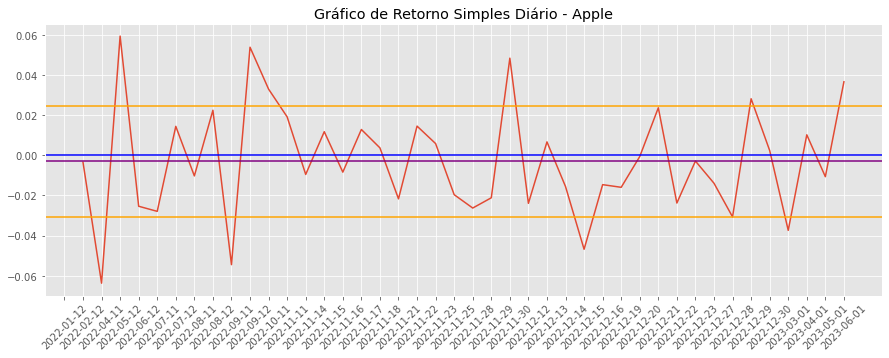

In [245]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(precos_apple['data'], precos_apple['retorno_simples'])
locs, labels = plt.xticks(rotation=45)
ax.axhline(y = 0, color = 'blue')
ax.axhline(y = media, color = 'purple')
ax.axhline(y = media + dp, color = 'orange')
ax.axhline(y = media - dp, color = 'orange')
ax.set_title('Gráfico de Retorno Simples Diário - Apple')

In [246]:
precos_ford['retorno_simples'] = (precos_ford.fechamento_ajustado/precos_ford.fechamento_ajustado.shift(1)) - 1
precos_ford.head()

,data,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,fechamento_ajustado,volume_transacoes,retorno_simples
24,2022-01-12,14.09,14.36,14.00,14.08,14.08,45335100.0,NaN
23,2022-02-12,13.84,13.97,13.75,13.86,13.86,42417400.0,-0.015625
22,2022-05-12,13.75,13.77,13.37,13.38,13.38,39714500.0,-0.034632
21,2022-06-12,13.42,13.57,13.06,13.28,13.28,39996000.0,-0.007474
20,2022-07-12,13.20,13.42,13.09,13.10,13.10,36609800.0,-0.013554


In [247]:
media = precos_ford.retorno_simples.mean()
print(f'A média de retorno diário é por volta de {precos_ford.retorno_simples.mean()}')

print(f'A mediana de retorno diário é por volta de {precos_ford.retorno_simples.median()}')

dp = st.stdev(precos_ford[np.isnan(precos_ford.retorno_simples) == False].retorno_simples)
print(f'E possui um desvio padrão de {dp}')

print(f'O retorno médio por ano: {precos_ford.retorno_simples.mean()*250}')

A média de retorno diário é por volta de -0.0027836893553996878
A mediana de retorno diário é por volta de 0.0010880443496622538
E possui um desvio padrão de 0.0264556587723925
O retorno médio por ano: -0.6959223388499219


Text(0.5, 1.0, 'Gráfico de Retorno Simples Diário - Ford')

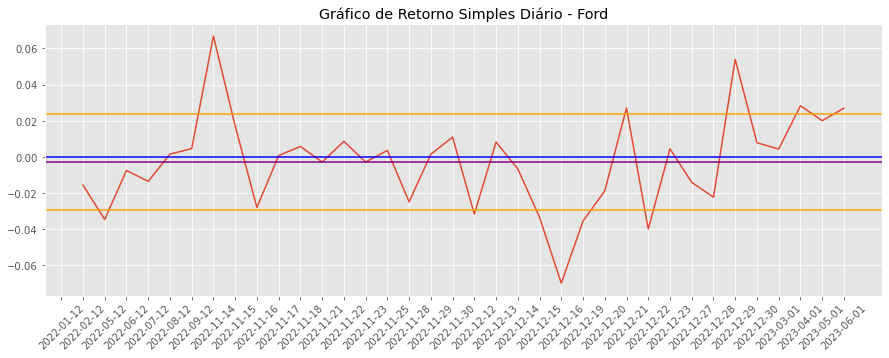

In [248]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(precos_ford['data'], precos_ford['retorno_simples'])
locs, labels = plt.xticks(rotation=45)
ax.axhline(y = 0, color = 'blue')
ax.axhline(y = media, color = 'purple')
ax.axhline(y = media + dp, color = 'orange')
ax.axhline(y = media - dp, color = 'orange')
ax.set_title('Gráfico de Retorno Simples Diário - Ford')

In [249]:
precos_ibm['retorno_simples'] = (precos_ibm.fechamento_ajustado/precos_ibm.fechamento_ajustado.shift(1)) - 1
precos_ibm.head()

,data,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,fechamento_ajustado,volume_transacoes,retorno_simples
24,2022-01-12,149.98,150.01,147.34,149.16,149.16,4495900.0,NaN
23,2022-02-12,148.13,149.16,147.73,148.67,148.67,2900000.0,-0.003285
22,2022-05-12,147.94,148.93,146.80,147.41,147.41,2784600.0,-0.008475
21,2022-06-12,147.30,147.80,146.70,147.50,147.50,2847600.0,0.000611
20,2022-07-12,147.33,148.10,146.29,147.27,147.27,3971300.0,-0.001559


In [250]:
media = precos_ibm.retorno_simples.mean()
print(f'A média de retorno diário é por volta de {precos_ibm.retorno_simples.mean()}')

print(f'A mediana de retorno diário é por volta de {precos_ibm.retorno_simples.median()}')

dp = st.stdev(precos_ibm[np.isnan(precos_ibm.retorno_simples) == False].retorno_simples)
print(f'E possui um desvio padrão de {dp}')

print(f'O retorno médio por ano: {precos_ibm.retorno_simples.mean()*250}')

A média de retorno diário é por volta de -0.0007348257299896444
A mediana de retorno diário é por volta de 0.0012470555632535518
E possui um desvio padrão de 0.021213387630631065
O retorno médio por ano: -0.1837064324974111


Text(0.5, 1.0, 'Gráfico de Retorno Simples Diário - IBM')

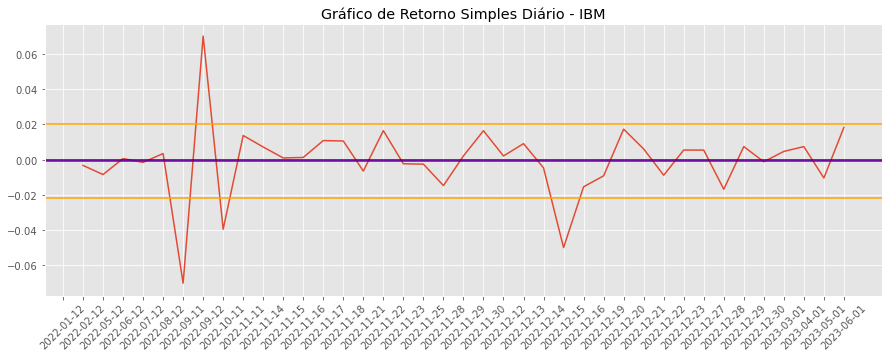

In [251]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(precos_ibm['data'], precos_ibm['retorno_simples'])
locs, labels = plt.xticks(rotation=45)
ax.axhline(y = 0, color = 'blue')
ax.axhline(y = media, color = 'purple')
ax.axhline(y = media + dp, color = 'orange')
ax.axhline(y = media - dp, color = 'orange')
ax.set_title('Gráfico de Retorno Simples Diário - IBM')

## Comparando o comportamento de cada ativo

In [252]:
precos_apple.columns = ['data', 'preco_abertura', 'preco_maximo', 'preco_minimo', \
                        'preco_fechamento', 'fechamento_ajustado_apple', 'volume_transacoes', \
                        'retorno_simples']

precos_ford.columns = ['data', 'preco_abertura', 'preco_maximo', 'preco_minimo', \
                        'preco_fechamento', 'fechamento_ajustado_ford', 'volume_transacoes', \
                        'retorno_simples']

precos_ibm.columns = ['data', 'preco_abertura', 'preco_maximo', 'preco_minimo', \
                        'preco_fechamento', 'fechamento_ajustado_ibm', 'volume_transacoes', \
                        'retorno_simples']

In [253]:
# Realizando join para puxar apenas preço de fechamento dos ativos

df = precos_apple.iloc[:,[0,5]].merge(precos_ibm.iloc[:,[0,5]], on = 'data', how = 'left') \
                               .merge(precos_ford.iloc[:,[0,5]], on = 'data', how = 'left')

# Retirando coluna de data
df.index = df['data']
df = df.drop(columns = 'data')

df.head()

,fechamento_ajustado_apple,fechamento_ajustado_ibm,fechamento_ajustado_ford
data,,,
2022-01-12,148.31,149.16,14.08
2022-02-12,147.81,148.67,13.86
2022-04-11,138.38,NaN,NaN
2022-05-12,146.63,147.41,13.38
2022-06-12,142.91,147.50,13.28


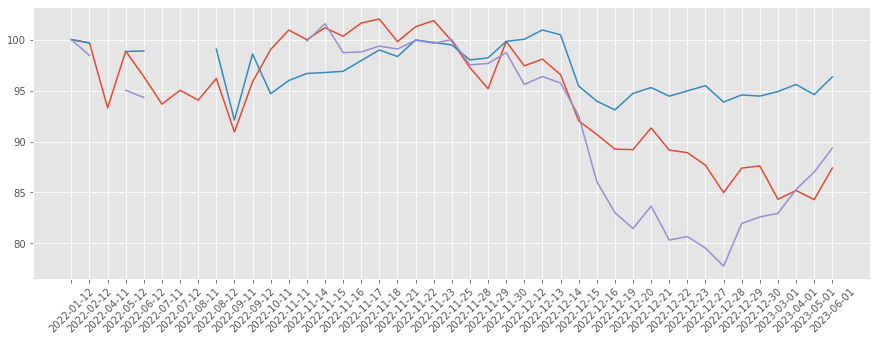

In [254]:
# Comparando

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df * 100/ df.iloc[0])
locs, labels = plt.xticks(rotation=45)

## Objetivo

<br>Iremos estimar o retorno de um portfólio considerando a taxa de retorno simples de cada ação e sua contribuição </br>
<br>A taxa de retorno de um ativo é simplesmente a diferença entre seu preço quando comprado e quando vendido em percentual:</br>

$$ retorno = \frac{preço_f \,- \,preço_i}{preço_i} $$

<br>Considerando o retorno de cada ação e sua partipação o retorno total da carteira estimado será:</br>

$$ retorno_t = investimento \,\sum^{n}_{i=1} r_i . p_i  $$

<br>Sendo $r_i$ o retorno do ativo i e $p_i$ seu percentual de partipação na carteira </br>

## Caso 1:

Consideraremos que Apple e Ford representam 40% do nosso portfólio cada e IBM 20%

## Caso 2:

Todos os ativos têm pesos iguais

In [259]:
## --------------- TAXAS DE RETORNO ---------- ##

# Verificando taxa de retorno média anual

tx_retorno_anual = []

tx_retorno_anual.append(precos_apple.retorno_simples.mean()*250)
tx_retorno_anual.append(precos_ford.retorno_simples.mean()*250)
tx_retorno_anual.append(precos_ibm.retorno_simples.mean()*250)

tx_retorno_anual

[-0.7065095821292602, -0.6959223388499219, -0.1837064324974111]

In [297]:
## --------------- TAXAS DE RETORNO ---------- ##

# Verificando taxa de retorno efetivo

tx_retorno_anual = []

tx_retorno_anual.append((precos_apple.iloc[-1,5]/precos_apple.iloc[0,5]) - 1)
tx_retorno_anual.append((precos_ford.iloc[-1,5]/precos_ford.iloc[0,5]) - 1)
tx_retorno_anual.append((precos_ibm.iloc[-1,5]/precos_ibm.iloc[0,5]) - 1)

tx_retorno_anual

[-0.12601982334299777, -0.10653409090909094, -0.03660498793242162]

In [298]:
## --------------- CASO 1 -------------------- ##

participacao = [0.4, 0.4, 0.2]

for i in range(len(participacao)):
    print(f'A ação {i} tem partipação de {participacao[i]} e taxa de retorno {tx_retorno_anual[i]}')

A ação 0 tem partipação de 0.4 e taxa de retorno -0.12601982334299777
A ação 1 tem partipação de 0.4 e taxa de retorno -0.10653409090909094
A ação 2 tem partipação de 0.2 e taxa de retorno -0.03660498793242162


In [299]:
# Suponhamos que investimos em 1000 ativos, o retorno será:

investimento = 1000

print(f'O percentual de retorno da carteira foi {np.dot(tx_retorno_anual, participacao)*100} %')

print(f'O que rendeu {investimento*(np.dot(tx_retorno_anual, participacao))}')

O percentual de retorno da carteira foi -10.034256328731983 %
O que rendeu -100.34256328731983


In [309]:
print(f'Investiu na Apple {investimento*participacao[0]} e, ao fim, tinha {precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5]}')

print(f'Investiu na Ford {investimento*participacao[1]} e, ao fim, tinha {precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5]}')

print(f'Investiu na IBM {investimento*participacao[2]} e, ao fim, tinha {precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5]}')

print(f'Montante inicial: {investimento}')
print(f'Montante final: {(precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5]) + (precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5]) + (precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5])}')
print(f'Perda de {(precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5] + precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5] + precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5])/1000 - 1}')

Investiu na Apple 400.0 e, ao fim, tinha 349.5920706628009
Investiu na Ford 400.0 e, ao fim, tinha 357.3863636363636
Investiu na IBM 200.0 e, ao fim, tinha 192.6790024135157
Montante inicial: 1000
Montante final: 899.6574367126802
Perda de -0.10034256328731972


In [310]:
## --------------- CASO 2 -------------------- ##

participacao = [1/3, 1/3, 1/3]

for i in range(len(participacao)):
    print(f'A ação {i} tem partipação de {participacao[i]} e taxa de retorno {tx_retorno_anual[i]}')

A ação 0 tem partipação de 0.3333333333333333 e taxa de retorno -0.12601982334299777
A ação 1 tem partipação de 0.3333333333333333 e taxa de retorno -0.10653409090909094
A ação 2 tem partipação de 0.3333333333333333 e taxa de retorno -0.03660498793242162


In [311]:
# Suponhamos que investimos 1000 reais, o retorno será:

investimento = 1000

print(f'O percentual de retorno da carteira foi {np.dot(tx_retorno_anual, participacao)*100} %')

print(f'O que rendeu {investimento*(np.dot(tx_retorno_anual, participacao))}')

O percentual de retorno da carteira foi -8.971963406150344 %
O que rendeu -89.71963406150343


In [312]:
print(f'Investiu na Apple {investimento*participacao[0]} e, ao fim, tinha {precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5]}')

print(f'Investiu na Ford {investimento*participacao[1]} e, ao fim, tinha {precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5]}')

print(f'Investiu na IBM {investimento*participacao[2]} e, ao fim, tinha {precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5]}')

print(f'Montante inicial: {investimento}')
print(f'Montante final: {(precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5]) + (precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5]) + (precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5])}')
print(f'Perda de {(precos_apple.iloc[-1,5]*investimento*participacao[0]/precos_apple.iloc[0,5] + precos_ford.iloc[-1,5]*investimento*participacao[1]/precos_ford.iloc[0,5] + precos_ibm.iloc[-1,5]*investimento*participacao[2]/precos_ibm.iloc[0,5])/1000 - 1}')

Investiu na Apple 333.3333333333333 e, ao fim, tinha 291.32672555233404
Investiu na Ford 333.3333333333333 e, ao fim, tinha 297.8219696969697
Investiu na IBM 333.3333333333333 e, ao fim, tinha 321.13167068919284
Montante inicial: 1000
Montante final: 910.2803659384965
Perda de -0.08971963406150352


## Teoria de Markowitz

In [ ]:
# retorno de uma carteira com 2 investimentos
#acao 1 = a - fracao o
#acao 2 = b - fracao 1-o
#capital k
#retornos de cada sao r1 e r2, com e(ri) = ui e var(ri) = desvio(ri)^2, para i = 1,2 
#e p é coeficiente de correlacao entre os ativos
#temos que
# k(1 + r) = ok(1+r1) + (1-o)(1+r2)
#r(o) = r1*o + r2(1-o) 
#casos mais simples